# HW3 Image Filtering: Disk Kernel

ECE472: Implement a disk_kernel() function based on the box_kernel() and circular_mask() functions from class. Modify show_imghist() to allow control over (vmin,vmax) range. Apply box_kernel() and disk_kernel() to cars.jpg. 

Add _brief_ Markdown summary of pertinent oberservations (which kernel blurs more, what looks the same/different in the two, etc).

ECE572: Same as ECE472.

In [13]:
%matplotlib inline
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io 
from skimage.util import img_as_float32 as img_as_float

from scipy.ndimage import convolve
# Load packages needed

In [14]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print("Data Range: ", np.min(I), "to", np.max(I))
    return np.min(I), np.max(I)
    # Copy from HW2

In [15]:
def show_imghist(I1,I2,I3):
    fig, ax = plt.subplots(3,2, figsize=(10,5))

    fig.subplots_adjust(hspace=1.25)

    ax[0,0].imshow(I1, cmap="gray", vmin=0.0, vmax=1.0)
    ax[0,0].set_axis_off()
    ax[0,0].set_title("Original Image")

    ax[0,1].hist(I1.ravel(), lw=0, bins=256)
    ax[0,1].set_xlim(0.0,1.0)
    ax[0,1].set_yticks([])
    ax[0,1].set_title("Original Image - Histogram")

    ax[1,0].imshow(I2, cmap='gray', vmin=0, vmax=1)
    ax[1,0].set_axis_off()
    ax[1,0].set_title("Blur - Box Kernel")

    ax[1,1].hist(I2.ravel(), lw=0, bins=256)
    ax[1,1].set_xlim(0.0,1.0)
    ax[1,1].set_yticks([])
    ax[1,1].set_title("Box Kernel - Histogram")

    ax[2,0].imshow(I3, cmap='gray', vmin=0, vmax=1)
    ax[2,0].set_axis_off()
    ax[2,0].set_title("Blur - Disk Kernel")
    
    ax[2,1].hist(I3.ravel(), lw=0, bins=256)
    ax[2,1].set_xlim(0.0,1.0)
    ax[2,1].set_yticks([])
    ax[2,1].set_title("Disk Kernel - Histogram")

    

    # Copy from HW2
    # Add optional vmin, vmax arguments that have default values of 0 and 1

In [16]:
# Read cars image, convert to float32
I1 = io.imread("./cars.jpg", as_gray=True)
I1 = img_as_float(I1)
# Run print_imginfo() and show_imghist()
print_imginfo(I1)

<class 'numpy.ndarray'>
(480, 728) float32
Data Range:  0.0 to 1.0


(0.0, 1.0)

In [17]:
def box_kernel(N, M=None):
    if M == None:
        M = N
    h = np.ones((N,M))
    h /= h.sum()

    return h
    
    
def disk_kernel(N):
    # Center coefficient equals 1
    kernel_disk = np.zeros((N,N))
    center = N//2
    kernel_disk[center,center]=1
    #normalized_kernel_disk = kernel_disk
    # Off-center coefficients equal inverse distance to center
    for x in range(kernel_disk.shape[0]):
        for y in range(kernel_disk.shape[1]):
            if x!=center or y!=center:
                #print(f"x: {x}")
                #print(f"y: {y}")
                inverse_distance = 1/(np.sqrt((center-x)**2+(center-y)**2))
                #print(f"distance: {np.sqrt((kernel_disk[center,center]-x)**2+(kernel_disk[center,center]-y)**2)}")
                #print(f"inverse_distance: {inverse_distance}")
                kernel_disk[x][y] = inverse_distance #not normalized yet
    # print(f"kernel_disk: {kernel_disk}")
    # print(f"kernel disk shape: {kernel_disk.shape}")
    
    # Normalize kernel 
    kernel_disk /= kernel_disk.sum()
    # print(f"kernel disk normalized: {kernel_disk}")
    # print(f"kernel disk normalized sum: {kernel_disk.sum()}")
    return kernel_disk



<class 'numpy.ndarray'>
(480, 728) float32
Data Range:  0.043604657 to 0.94553936

<class 'numpy.ndarray'>
(480, 728) float32
Data Range:  0.042320225 to 0.96647286


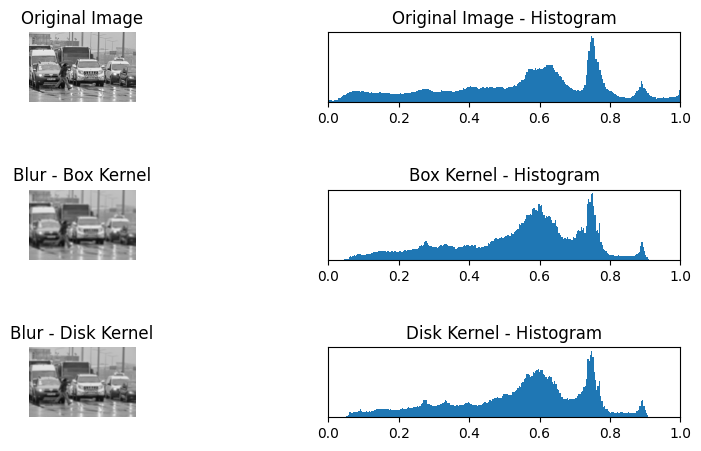

In [18]:
# Apply box_kernel(N) and disk_kernel(N) to loaded image using scipy.ndimage.convolve().
mode = 'reflect'
h1 = box_kernel(15) #applying the box kernel
I2 = convolve(I1, h1, mode=mode)
h2 = disk_kernel(15)
I3 = convolve(I1, h2, mode=mode)
# Ultimately, use N=15 but try smaller and larger values as well to see effects thereof.
# Run print_imginfo() and show_imghist() on blurred image, say Iblur. Repeat for difference
print_imginfo(I2)
print("")
print_imginfo(I3)

show_imghist(I1,I2,I3)
# wrt original image, i.e., Iblur-I. Use appropriate (vmin,max) values.

In [19]:
def nums(a,b):
    c = a + b
    d = a*b
    return c,d

print(f"c: {nums(4,7)[0]}")
print(f"d: {nums(4,7)[1]}")

c: 11
d: 28
